# A Cando-app to setup free energy perturbation calculations using AMBER

First we do the following:

  * Load the FEP package.
  * Set things up to carry out geometry optimization using Amber.

In [1]:
*default-pathname-defaults*

#P"/Users/meister/Development/cando-dev/extensions/cando/src/examples/lysozyme-fep/"

In [2]:
(ql:quickload :fep)

To load "fep":
  Load 1 ASDF system:
    fep

; Loading "fep"



(:FEP)

In [3]:
(setup-default-paths)

Paths: (/Users/meister/Development/cando-dev/extensions/cando/src/examples/lysozyme-fep/
 /Users/meister/Dropbox/amber18/dat/antechamber/
 /Users/meister/Dropbox/amber18/dat/leap/cmd/
 /Users/meister/Dropbox/amber18/dat/leap/parm/
 /Users/meister/Dropbox/amber18/dat/leap/lib/
 /Users/meister/Dropbox/amber18/dat/leap/prep/)


NIL

In [4]:
(load-atom-type-rules "ATOMTYPE_GFF.DEF")

#<FORCE-FIELD ATOMTYPE_GFF.DEF>

In [5]:
(core:getpid)

89049

In [6]:
(loop repeat 10(source "leaprc.ff14SB.redq")

Adding force field parm10.dat to DEFAULT
Adding force field frcmod.ff14SB to DEFAULT



add-atom-types doesn't do anything

Warning!  Skipping 10-12 hbond


Warning!  Skipping force field atom equivalences



T

In [7]:
(source "leaprc.gaff")

Adding force field gaff.dat to DEFAULT



add-atom-types doesn't do anything

Warning!  Skipping 10-12 hbond


Warning!  Skipping force field atom equivalences



T

In [8]:
(list-force-fields)

:DEFAULT (#<FORCE-FIELD gaff.dat> #<FORCE-FIELD frcmod.ff14SB> #<FORCE-FIELD parm10.dat>
 #<FORCE-FIELD ATOMTYPE_GFF.DEF> #<FORCE-FIELD >)


NIL

In [9]:
(start-swank)

T

In [10]:
(defparameter *foo* 1234)

*FOO*

# Start a new FEP calculation

In [11]:
(defparameter *feps* (make-instance 'fep::fep-calculation))

*FEPS*

# Import sketch - use Chemdraw

## Open chemdraw and add more functional groups if you want

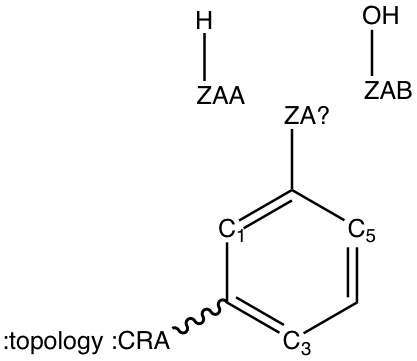

In [149]:
(png-from-file "ligands.png" )

In [152]:
(defparameter *sk* (handler-bind ((warning #'muffle-warning))
             (with-open-file (fin (open "ligands.cdxml" :direction :input))
             (chem:make-chem-draw fin :add-hydrogens nil))))

ChemDraw_O::parse child of page with name(fragment)
CDFragment - starting
CDNode id(337) color(3) label(C_337)
CDNode id(339) color(3) label(C1)
CDNode id(341) color(3) label(C_341)
CDNode id(343) color(3) label(C3)
CDNode id(345) color(3) label(C_345)
CDNode id(347) color(3) label(C5)
CDNode id(363) color(3) label(ZA?)
CDNode id(365) color(3) label(:topology :CRA)
CDBond _IdBegin(337) _IdEnd(339) order(2) display()
CDBond _IdBegin(339) _IdEnd(341) order(1) display()
CDBond _IdBegin(341) _IdEnd(343) order(2) display()
CDBond _IdBegin(343) _IdEnd(345) order(1) display()
CDBond _IdBegin(345) _IdEnd(347) order(2) display()
CDBond _IdBegin(347) _IdEnd(337) order(1) display()
CDBond _IdBegin(337) _IdEnd(363) order(1) display()
CDBond _IdBegin(341) _IdEnd(365) order(1) display(Wavy)
CDFragment - done.
Adding molecule property :TOPOLOGY value: :CRA
ChemDraw_O::parse child of page with name(fragment)
CDFragment - starting
CDNode id(355) color(3) label(H)
CDNode id(357) color(3) label(ZAA)
CDBo

*SK*

In [153]:
(start-swank)

Swank is already running


NIL

In [154]:
(fep:setup-ligands *feps* *sk*)

Average bond length: 29.99970501898104d0
In build-topologys core-group: (#<ATOM :C_341/:C @0x13f9a8699> #<ATOM :C1/:C @0x13f9a8789>
 #<ATOM :C3/:C @0x13f9a85a9> #<ATOM :C_337/:C @0x13f9a8879>
 #<ATOM :C_345/:C @0x13f9a84b9> #<ATOM :C5/:C @0x13f9a83c9>
 #<ATOM :ZA?/:NE @0x13f9a81e9>)
side-chain-groups: #<HASH-TABLE-EQL :HashTableCount 2 :calculated-entries 2 :size 16 @0x13c6b4058>
map-names-numbers: #<HASH-TABLE-EQL :HashTableCount 0 :calculated-entries 0 :size 16 @0x13c6b40f8>
Hydrogens built 100.0% elapsed: -- ETC: --   
Hydrogens built 100.0% elapsed: -- ETC: --   


(#<FEP-STRUCTURE AA> #<FEP-STRUCTURE AB>)

In [155]:
(defparameter *v* (show (fep:layout-ligands *feps*))) *v*

#<NGLV:NGLWIDGET>

In [156]:
(defparameter *tests* (list (cons :c1 (lambda (a) (eq (chem:get-name a) :c1)))
                  (cons :c3 (lambda (a) (eq (chem:get-name a) :c3)))
                  (cons :c5 (lambda (a) (eq (chem:get-name a) :c5)))))

*TESTS*

In [157]:
(defparameter *pick* (chem:compile-smarts 
             "[C:6]1~[C<c1>:1]~[C:2]~[C<c3>:3]~[C:4]~[C<c5>:5]1" :tests *tests*))

*PICK*

In [158]:
(show (fep:molecule (find-if (lambda (x) (eq (fep:name x) :AA)) (fep:ligands *feps*))))

#<NGLV:NGLWIDGET>

# Load the lysozyme PDB file

In [169]:
(defparameter *lysozyme* (load-pdb "181L_mod.pdb"))


Creating molecule with name: A




There are 1 unbuilt heavy atoms - not building hydrogens


*LYSOZYME*

In [170]:
(cando:build-unbuilt-hydrogens *lysozyme*)

Building from sorted-built: (#<ATOM :C/:C @0x11fec04b9> #<ATOM :CB/:C @0x120b82009>
 #<ATOM :N/:N @0x120b825a9>)
Hydrogens built   0.0% elapsed: -- ETC: --   Building from sorted-built: (#<ATOM :C/:C @0x11ff0f4b9> #<ATOM :CB/:C @0x11ff0ff09>
 #<ATOM :N/:N @0x11fec02d9>)
Hydrogens built   1.0% elapsed: -- ETC: --   Building from sorted-built: (#<ATOM :C/:C @0x11f997d29> #<ATOM :CB/:C @0x11ffa0f09>
 #<ATOM :N/:N @0x11ff0f2d9>)
Building from sorted-built: (#<ATOM :CA/:C @0x11ff0f0f9> #<ATOM :CG1/:C @0x11ffa03c9>
 #<ATOM :CG2/:C @0x11ffa0d29>)
Hydrogens built   2.0% elapsed: -- ETC: --   Building from sorted-built: (#<ATOM :C/:C @0x11f9e5009> #<ATOM :CB/:C @0x11f997789>
 #<ATOM :N/:N @0x11f997b49>)
Building from sorted-built: (#<ATOM :C/:C @0x11da7fb49> #<ATOM :CB/:C @0x11fa60699>
 #<ATOM :N/:N @0x11fa60e19>)
Hydrogens built   3.0% elapsed: -- ETC: --   Building from sorted-built: (#<ATOM :C/:C @0x11d7ea969> #<ATOM :CB/:C @0x11db023c9>
 #<ATOM :N/:N @0x11da7f969>)
Hydrogens built   4.0% el

1313

In [171]:
(simple-build-unbuilt-atoms *lysozyme*)

NIL

In [172]:
(defparameter *v* (show *lysozyme*)) *v*

#<NGLV:NGLWIDGET>

In [173]:
(nglv::add-representation *v* "ball+stick" :selection "all")

T

In [174]:
(simple-build-unbuilt-atoms *lysozyme*)

NIL

In [175]:
*lysozyme*

#<AGGREGATE 181L_mod>

In [176]:
(pushnew *lysozyme* (fep:receptors *feps*))

(#<AGGREGATE 181L_mod>)

# Load the ligands

In [177]:
*default-pathname-defaults*

#P"/Users/meister/Development/cando-dev/extensions/cando/src/examples/lysozyme-fep/"

In [178]:
(load-off "phen.lib")
(load-off "benz.lib")

(BNZ)

In [179]:
(defparameter *ligs* (load-pdb "bnz_phn.pdb"))


Creating molecule with name: A
Creating molecule with name: A




There are 1 unbuilt heavy atoms - not building hydrogens


*LIGS*

In [180]:
(simple-build-unbuilt-atoms *ligs*)
(build-unbuilt-hydrogens *ligs*)

Hydrogens built 100.0% elapsed: -- ETC: --   


12

In [181]:
(show *ligs*)

#<NGLV:NGLWIDGET>

## Print the fixed atoms of the template ligand

In [182]:
(alexandria:hash-table-alist (fep:pattern-atoms *pick* *ligs*))

((2 . #<ATOM :C2/:C @0x127d433c9>) (6 . #<ATOM :C6/:C @0x1274d0c39>)
 (3 . #<ATOM :C3/:C @0x127d431e9>) (5 . #<ATOM :C5/:C @0x1274d0e19>)
 (4 . #<ATOM :C4/:C @0x127d43009>) (1 . #<ATOM :C1/:C @0x127d435a9>))

# Use the GAFF force field to build chemically reasonable structures of candidate ligands

In [183]:
(fep:build-ligands *feps*)

Building AA
build-structures fep: #<FEP-STRUCTURE AA>   map-atoms: NIL
Building AB
build-structures fep: #<FEP-STRUCTURE AB>   map-atoms: NIL


NIL

In [184]:
(mapcar #'fep:molecule (fep:ligands *feps*))

(#<MOLECULE :AA> #<MOLECULE :AB>)

In [185]:
(show (fep:layout-ligands *feps* :accessor 'fep::molecule))

#<NGLV:NGLWIDGET>

# Pose the new ligands onto the template ligand

In [187]:
(fep::pose-ligands-using-pattern *feps* *pick* *ligs*)

fep #<FEP-STRUCTURE AA>
 moveable-atoms -> #<FEP-STRUCTURE AA>
    fixed-atoms -> (#<ATOM :C2/:C @0x127d433c9> #<ATOM :C6/:C @0x1274d0c39>
 #<ATOM :C3/:C @0x127d431e9> #<ATOM :C5/:C @0x1274d0e19>
 #<ATOM :C4/:C @0x127d43009> #<ATOM :C1/:C @0x127d435a9>)
Anchored #<ATOM :C_341/:C @0x13c28f879> to '( 26.395 5.074 3.499) restraints: (#<RESTRAINT-ANCHOR >) props: (:CHEMDRAW-COLOR 3)
Anchored #<ATOM :C_337/:C @0x13c28f2d9> to '( 26.498 6.379 5.469) restraints: (#<RESTRAINT-ANCHOR >) props: (:ATTACH :ZA :CHEMDRAW-COLOR 3)
Anchored #<ATOM :C3/:C @0x13c28f699> to '( 27.34 5.86 2.902) restraints: (#<RESTRAINT-ANCHOR >) props: (:CHEMDRAW-COLOR 3)
Anchored #<ATOM :C5/:C @0x13c28f0f9> to '( 27.42 7.196 4.856) restraints: (#<RESTRAINT-ANCHOR >) props: (:CHEMDRAW-COLOR 3)
Anchored #<ATOM :C_345/:C @0x13c28f1e9> to '( 27.837 6.921 3.569) restraints: (#<RESTRAINT-ANCHOR >) props: (:CHEMDRAW-COLOR 3)
Anchored #<ATOM :C1/:C @0x13c28f789> to '( 25.978 5.327 4.779) restraints: (#<RESTRAINT-ANCHOR >) props

NIL

In [188]:
(defparameter vreceptor (show *lysozyme*)) vreceptor

#<NGLV:NGLWIDGET>

In [190]:
(defparameter *moveable-agg* (chem:make-aggregate))
(chem:add-matter *moveable-agg* (fep::molecule (second (fep:ligands *feps*))))
(defparameter *struct* (make-instance 'cando-structure :matter *moveable-agg*))
(nglv::add-structure vreceptor *struct*)

#<CANDO-JUPYTER:CANDO-STRUCTURE>

# Define the pairs of compounds between which we want to carry out free energy perturbation calculations

In [126]:
(fep::build-initial-jobs *feps* :connections 2 :stages 3 :windows 11)

Morph from source: #<FEP-STRUCTURE AA> to target: #<FEP-STRUCTURE AB>


#<JOB-GRAPH>

In [127]:
(fep:jobs *feps*)

#<JOB-GRAPH>

In [128]:
(graph::save-graph *feps*)

#<fep-calculation>

# Generate the calculations

In [129]:
(start-swank)

Swank is already running


NIL

In [130]:
(defparameter *work-list* (fep::generate-jobs *feps*))

Creating am1 scripts in /Users/meister/Development/cando-dev/extensions/cando/src/examples/lysozyme-fep/jobs/
Generating script am1bcc/aa.in
Generating script am1bcc/ab.in
About to set outputs result -> (#<FEP::LIGAND-SQM-JOB> #<FEP::LIGAND-SQM-JOB>)
Printing job-graph
Printing job-graph
Writing makefile to /Users/meister/Development/cando-dev/extensions/cando/src/examples/lysozyme-fep/jobs/makefile
Skipping generation of charge.lisp - it has not changed
Skipping generation of AA-AB/complex/recharge/recharge.lisp - it has not changed
Skipping generation of AA-AB/complex/recharge/1.000/ti.in - it has not changed
Skipping generation of getdvdl.py - it has not changed
Skipping generation of AA-AB/complex/side-script.lisp - it has not changed
Skipping generation of AA-AB/morph-script.lisp - it has not changed
Skipping generation of AA-AB/complex/recharge/1.000/heat.in - it has not changed
Skipping generation of AA-AB/complex/recharge/0.900/ti.in - it has not changed
Skipping generation of 

*WORK-LIST*

In [131]:
*work-list*

#<FEP::JUPYTER-JOB>

In [132]:
(with-open-file (sout "/tmp/graph.dot" :direction :output)
    (fepdot::draw-graph-stream (list *work-list*) sout))

NIL

In [133]:
(ext:system "dot -Tpdf -O /tmp/graph.dot")

0

In [134]:
(ext:system "open -n /tmp/graph.dot.pdf")

0